# 이상치 제거 버전

# 1. 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
padua = pd.read_csv('../data/kideny_PADUA_upload.csv')
renal = pd.read_csv('../data/kideny_RENAL_upload.csv')
treat = pd.read_csv('../data/kidney_treat_upload.csv')

# 2. 데이터 정리
- V1 동일 내용 생략

In [3]:
# padua_data, renal_data 데이터 merge
merged_data = pd.merge(padua, renal, on='serial')
# padua 에서 중복 컬럼 삭제
merged_data = merged_data.drop(['Tumor_PADUA', 'Exophytic_PADUA'], axis=1)
# treat 데이터 merge
merged_result = pd.merge(merged_data, treat, on='serial', how='left')
# serial을 인덱스로 설정
merged_result.set_index('serial', inplace=True)

In [4]:
merged_result = merged_result.rename(columns={'Radius_RENAL': 'T_size', 'Exophytic_RENAL':'T_exophytic',
                            'Rim_PADUA':'T_surface_loc','Polarlocation_PADUA':'T_height_loc',
                            'Collectingsystem_PADUA':'T_GM_over','Sinus_PADUA':'T_Sinus_dt',
                            'Nearness_RENAL':'T_near_Ureter','APX_RENAL':'T_APX','Location_RENAL':'T_rel_Ureter','RAIV_1': 'RAIV'
                            })

In [5]:
merged_result = merged_result.dropna()

In [6]:
merged_result['Total'] = merged_result[['PADUA_total', 'RENAL_total']].sum(axis=1)
merged_result.drop(columns=['PADUA_total', 'RENAL_total'], inplace=True)

In [7]:
merged_result['T_size_exo'] = merged_result['T_size'] + merged_result['T_exophytic']

In [8]:
merged_result = merged_result[['T_surface_loc', 'T_Sinus_dt', 'T_height_loc', 'T_GM_over', 'T_size', 'T_exophytic', 'T_near_Ureter', 'T_rel_Ureter', 'T_APX', 'Total', 'T_size_exo', 'RAIV']]

In [9]:
merged_result = merged_result.dropna()

In [10]:
merged_result

,T_surface_loc,T_Sinus_dt,T_height_loc,T_GM_over,T_size,T_exophytic,T_near_Ureter,T_rel_Ureter,T_APX,Total,T_size_exo,RAIV
serial,,,,,,,,,,,,
1,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,12,3.0,51.1
2,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,13,3.0,46.1
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,10,2.0,14.8
4,1.0,1.0,2.0,2.0,1.0,1.0,3.0,3.0,2.0,13,2.0,19.7
5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,12,3.0,14.8
...,...,...,...,...,...,...,...,...,...,...,...,...
408,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,12,3.0,21.3
409,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,12,3.0,30.5
410,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,11,3.0,70.7


In [11]:
merged_result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 389 entries, 1 to 412
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_surface_loc  389 non-null    float64
 1   T_Sinus_dt     389 non-null    float64
 2   T_height_loc   389 non-null    float64
 3   T_GM_over      389 non-null    float64
 4   T_size         389 non-null    float64
 5   T_exophytic    389 non-null    float64
 6   T_near_Ureter  389 non-null    float64
 7   T_rel_Ureter   389 non-null    float64
 8   T_APX          389 non-null    float64
 9   Total          389 non-null    int64  
 10  T_size_exo     389 non-null    float64
 11  RAIV           389 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 39.5 KB


# 3. 데이터 탐색(EDA)
- V1버전 동일 내용 생략

---

## 이상치제거O : merged_data_80이라는 변수를 제거한 merged_drop 을 사용하세요 (아래에 생성해둠) (v2버전)


RAIV가 80이상인 데이터 따로 변수에 할당해줌

In [12]:
merged_data_80 = merged_result[merged_result['RAIV'] > 80]
merged_data_80

,T_surface_loc,T_Sinus_dt,T_height_loc,T_GM_over,T_size,T_exophytic,T_near_Ureter,T_rel_Ureter,T_APX,Total,T_size_exo,RAIV
serial,,,,,,,,,,,,
11,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,10,2.0,95.7
16,1.0,2.0,1.0,1.0,1.0,2.0,3.0,1.0,2.0,14,3.0,85.4
19,2.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0,15,4.0,114.0
22,1.0,2.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,16,4.0,154.8
46,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,11,3.0,94.2
50,1.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,1.0,13,4.0,111.3
53,2.0,1.0,1.0,1.0,1.0,3.0,1.0,2.0,2.0,14,4.0,103.6
60,1.0,1.0,2.0,1.0,1.0,3.0,1.0,3.0,1.0,14,4.0,143.4
79,1.0,1.0,2.0,1.0,1.0,2.0,3.0,2.0,2.0,14,3.0,93.6


RAIV80이상인 데이터없는 데이터 새로 만들어줌
(merged_data는 살려둠)

In [13]:
result_copy = merged_result.copy()

## 2. v2 데이터 (이상치제거O)

In [14]:
#이상치 제거버전
merged_drop = merged_result.drop(merged_data_80.index)
merged_drop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371 entries, 1 to 412
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_surface_loc  371 non-null    float64
 1   T_Sinus_dt     371 non-null    float64
 2   T_height_loc   371 non-null    float64
 3   T_GM_over      371 non-null    float64
 4   T_size         371 non-null    float64
 5   T_exophytic    371 non-null    float64
 6   T_near_Ureter  371 non-null    float64
 7   T_rel_Ureter   371 non-null    float64
 8   T_APX          371 non-null    float64
 9   Total          371 non-null    int64  
 10  T_size_exo     371 non-null    float64
 11  RAIV           371 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 37.7 KB


# 04. 데이터 나누기(train_test_split)

In [15]:
from sklearn.model_selection import train_test_split

X = merged_drop.drop(['RAIV'], axis=1)  # 'RAIV_1' 열을 제외한 모든 열 선택
y = merged_drop['RAIV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

## 실루엣계수로 최적 군집 개수 확인

In [16]:
# 수정 전
# kmeans.fit(merged_drop)
# silhouette_score_ = silhouette_score(merged_drop, kmeans.labels_)

Exception in thread Thread-5:
Traceback (most recent call last):
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\threading.py", line 932, in _bootstrap_inner
    self.run()
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\subprocess.py", line 1386, in _readerthread
    buffer.append(fh.read())
  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb1 in position 24: invalid start byte


  File "c:\Users\rbfl7\miniconda3\envs\ds_study\lib\site-packages\joblib\externals\loky\backend\context.py", line 202, in _count_physical_cores
    cpu_info = cpu_info.stdout.splitlines()


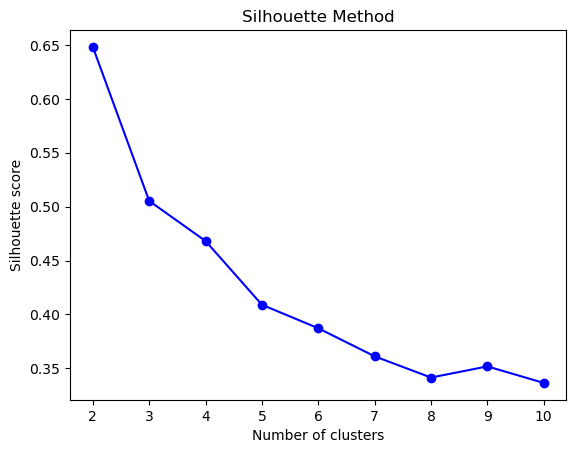

In [17]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 군집수에 따른 실루엣계수를 담을 리스트
silhouette_scores = []

# 2~10까지 군집수를 변화시키며 실루엣계수를 계산
for n_clusters in range(2, 11):
    # KMeans 군집화 수행
    kmeans = KMeans(n_clusters=n_clusters, random_state=13)
    kmeans.fit(merged_drop)

    # 실루엣계수 계산
    silhouette_score_ = silhouette_score(merged_drop, kmeans.labels_)
    silhouette_scores.append(silhouette_score_)

# 군집수에 따른 실루엣계수 그래프 그리기
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Method')
plt.show()

실루엣 점수가 가장 높은 2개가 최적의 군집 수로 판단

## X_train 데이터로 군집 0 과 1로 나눔 (이상치 제거O)

In [18]:
# 수정 전
# kmeans.fit(merged_drop)
# # 군집 0과 1로 나누기
# re_cluster_0 = merged_drop[labels == 0]
# re_cluster_1 = merged_drop[labels == 1]

In [19]:
# 군집화 수행
kmeans = KMeans(n_clusters=2, random_state=13)
kmeans.fit(merged_drop)

# 군집 레이블 생성
labels = kmeans.labels_

# 군집 0과 1로 나누기
mer_cluster_0 = merged_drop[labels == 0]
mer_cluster_1 = merged_drop[labels == 1]

# 군집 0과 1 출력
print("\nmer_cluster_0:")
print(mer_cluster_0.head())
print("\nmer_cluster_1:")
print(mer_cluster_1.head())



mer_cluster_0:
        T_surface_loc  T_Sinus_dt  T_height_loc  T_GM_over  T_size  \
serial                                                               
3                 1.0         1.0           2.0        1.0     1.0   
4                 1.0         1.0           2.0        2.0     1.0   
5                 1.0         1.0           2.0        1.0     1.0   
6                 1.0         1.0           1.0        1.0     1.0   
17                1.0         2.0           2.0        1.0     1.0   

        T_exophytic  T_near_Ureter  T_rel_Ureter  T_APX  Total  T_size_exo  \
serial                                                                       
3               1.0            1.0           1.0    1.0     10         2.0   
4               1.0            3.0           3.0    2.0     13         2.0   
5               2.0            1.0           3.0    1.0     12         3.0   
6               1.0            1.0           1.0    1.0      9         2.0   
17              1.0      

### 군집0 과 군집1의 모든 변수들의 분포도를 2차원데이터로 시각화

In [20]:
# 수정 전
# # Create a list of variable names
# variable_names = ['T_surface_loc', 'T_sinus_dt', 'T_height_loc', 'T_gm_over', 'T_size', 'T_Exophytic', 'T_near_ureter', 'T_rel_ureter', 'T_APX' , 'RAIV', 'Total', 'T_size_exo']

# y=mer_cluster_0['RAIV']

In [21]:
# Create a list of variable names
variable_names = ['T_surface_loc', 'T_Sinus_dt', 'T_height_loc', 'T_GM_over', 'T_size', 'T_exophytic', 'T_near_Ureter', 'T_rel_Ureter', 'T_APX', 'Total', 'T_size_exo','RAIV']

# Loop through each variable and create a scatter plot for each cluster
for variable in variable_names:
    # Create a scatter plot for cluster 0
    trace_cluster_0 = go.Scatter(
        x=mer_cluster_0[variable],
        y=mer_cluster_0['RAIV'],
        mode='markers',
        name='mer_cluster_0'
    )

    # Create a scatter plot for cluster 1
    trace_cluster_1 = go.Scatter(
        x=mer_cluster_1[variable],
        y=mer_cluster_1['RAIV'],
        mode='markers',
        name='mer_cluster_1'
    )

    # Create layout
    layout = go.Layout(
        title="Scatter Plot of {} vs RAIV".format(variable),
        xaxis=dict(title=variable),
        yaxis=dict(title='RAIV')
    )

    # Create figure and add traces
    fig = go.Figure(data=[trace_cluster_0, trace_cluster_1], layout=layout)

    # Show plot
    fig.show()


In [22]:
mer_cluster_0.head()

,T_surface_loc,T_Sinus_dt,T_height_loc,T_GM_over,T_size,T_exophytic,T_near_Ureter,T_rel_Ureter,T_APX,Total,T_size_exo,RAIV
serial,,,,,,,,,,,,
3,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,10,2.0,14.8
4,1.0,1.0,2.0,2.0,1.0,1.0,3.0,3.0,2.0,13,2.0,19.7
5,1.0,1.0,2.0,1.0,1.0,2.0,1.0,3.0,1.0,12,3.0,14.8
6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,9,2.0,18.5
17,1.0,2.0,2.0,1.0,1.0,1.0,3.0,2.0,2.0,13,2.0,31.4


In [23]:
mer_cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 3 to 412
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_surface_loc  290 non-null    float64
 1   T_Sinus_dt     290 non-null    float64
 2   T_height_loc   290 non-null    float64
 3   T_GM_over      290 non-null    float64
 4   T_size         290 non-null    float64
 5   T_exophytic    290 non-null    float64
 6   T_near_Ureter  290 non-null    float64
 7   T_rel_Ureter   290 non-null    float64
 8   T_APX          290 non-null    float64
 9   Total          290 non-null    int64  
 10  T_size_exo     290 non-null    float64
 11  RAIV           290 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 29.5 KB


In [24]:
mer_cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, 1 to 410
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   T_surface_loc  81 non-null     float64
 1   T_Sinus_dt     81 non-null     float64
 2   T_height_loc   81 non-null     float64
 3   T_GM_over      81 non-null     float64
 4   T_size         81 non-null     float64
 5   T_exophytic    81 non-null     float64
 6   T_near_Ureter  81 non-null     float64
 7   T_rel_Ureter   81 non-null     float64
 8   T_APX          81 non-null     float64
 9   Total          81 non-null     int64  
 10  T_size_exo     81 non-null     float64
 11  RAIV           81 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 8.2 KB


## 군집 간의 차이(이미지)

In [25]:
# 수정 전
# 이상치를 제거한 데이터 : 군집0 > 군집1 (290:81)
# 이상치를 제거하지 않은 데이터 : 군집0 > 군집1 (307:82)